In [11]:
import numpy as np
import panel as pn
import matplotlib.pyplot as plt

Column
    [0] FloatSlider(end=10.0, name='Puissance', start=0.1, value=1.0)
    [1] ParamFunction(function, _pane=Matplotlib)
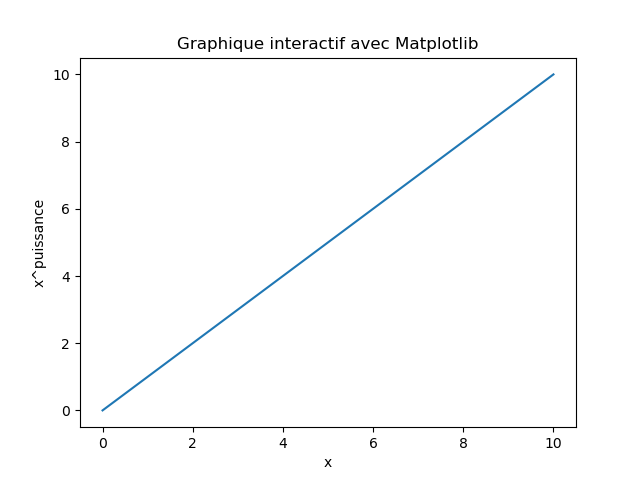

In [12]:
#chargement de l'extension Panel
pn.extension()

# Données pour le graphique
x = np.linspace(0, 10, 201)

# Création du panneau interactif avec un widget pour la puissance
puissance_widget = pn.widgets.FloatSlider(name='Puissance', start=0.1, end=10.0, step=0.1, value=1.0)

@pn.depends(puissance_widget.param.value)
def update_plot(puissance):
    fig, ax = plt.subplots()
    ax.plot(x, x**puissance)
    ax.set_title('Graphique interactif avec Matplotlib')
    ax.set_xlabel('x')
    ax.set_ylabel('x^puissance')
    plt.close(fig)
    return fig

# Création du panneau interactif
panel_matplotlib = pn.Column(puissance_widget, update_plot)

# Affichage du panneau interactif
panel_matplotlib

1.0


1.2000000000000002 
1.4000000000000004 
1.3 
0.6

Column
    [0] FloatSlider(end=2.0, name='Coefficient', start=0.1, value=1.0)
    [1] ParamFunction(function, _pane=Matplotlib)
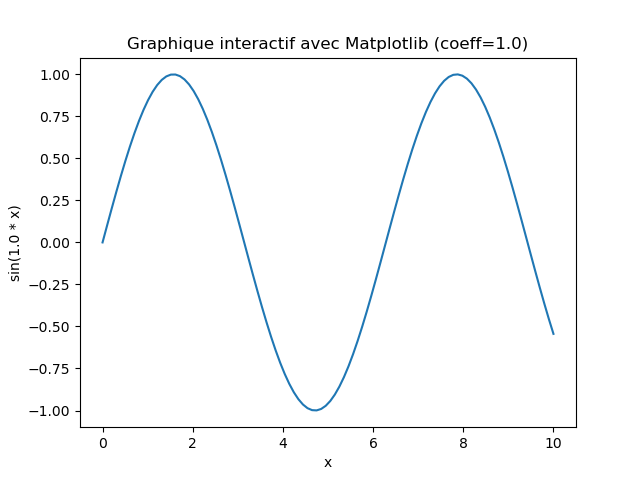

In [9]:
pn.extension()

# Données pour le graphique
x = np.linspace(0, 10, 100)

# Fonction pour créer un graphique interactif avec un coefficient
def plot_matplotlib(coeff=1.0):
    y = np.sin(coeff * x)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title(f'Graphique interactif avec Matplotlib (coeff={coeff})')
    ax.set_xlabel('x')
    ax.set_ylabel(f'sin({coeff} * x)')
    plt.close(fig)
    print(coeff)
    return fig

# Widgets interactifs
coeff_widget = pn.widgets.FloatSlider(name='Coefficient', start=0.1, end=2.0, step=0.1, value=1.0)

# Fonction pour mettre à jour le graphique
@pn.depends(coeff_widget.param.value)
def update_plot(coeff):
    return plot_matplotlib(coeff)

# Création du panneau interactif
panel_matplotlib = pn.Column(coeff_widget, update_plot)

# Affichage du panneau interactif
panel_matplotlib


Tabs
    [0] Column
        [0] FloatSlider(end=20, name='Xmin', start=-20, value=-5)
        [1] FloatSlider(end=20, name='Xmax', start=-20, value=5)
        [2] ParamFunction(function, _pane=Matplotlib)
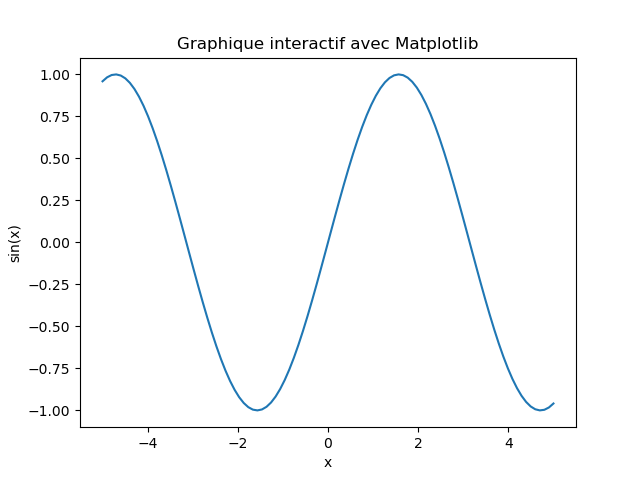

In [13]:
pn.extension()

# Widgets interactifs
min_widget = pn.widgets.FloatSlider(name='Xmin', start=-20, end=20, step=0.1, value=-5)
max_widget = pn.widgets.FloatSlider(name='Xmax', start=-20, end=20, step=0.1, value=5)

# Fonction pour créer un graphique interactif avec un coefficient
def plot_matplotlib(xmin, xmax):
    x = np.linspace(xmin, xmax, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title('Graphique interactif avec Matplotlib')
    ax.set_xlabel('x')
    ax.set_ylabel('sin(x)')
    plt.close(fig)
    return fig

# Fonction pour mettre à jour le graphique
@pn.depends(min_widget.param.value, max_widget.param.value)
def update_plot(xmin, xmax):
    return plot_matplotlib(xmin, xmax)

# Création du panneau interactif
panel_matplotlib = pn.Column(min_widget, max_widget, update_plot)

# Création d'un tableau de bord
dashboard = pn.Tabs(('Graphique Matplotlib', panel_matplotlib))

# Affichage du tableau de bord
dashboard